# Hypothesis testing on weather paying the lunch affects student's math exam score

In this I will poses data from [Here](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores) which has 1000 entries of students exam scores, with 9 features, from which the interesing to us is the `math score` and `lunch`. I will use two-sample t-test to see if there is significant differnce in the math scores of students who get standard lunch compared to htose who get free/reduced lunch.

## More about data
`lunch` has value `free/reduced` if the students are getting free lunch or the price is reduced, `standard` otherwise.


## Loading data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
data = pd.read_csv('exams.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## Empirical analysis

Let's look into the histograms of the students getting `standard` lunch and the students getting `free/reduced` lunch

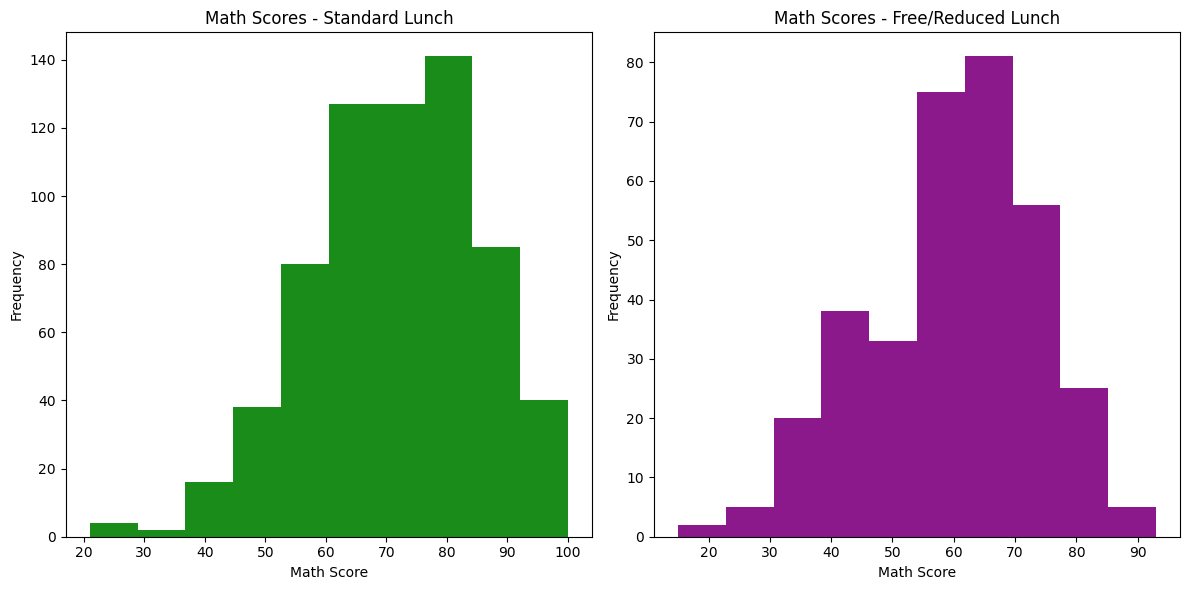

In [3]:
standard_lunch = data[data['lunch'] == 'standard']['math score']
reduced_lunch = data[data['lunch'] == 'free/reduced']['math score']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(standard_lunch, bins=10, color='green', alpha=0.9)
plt.title('Math Scores - Standard Lunch')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(reduced_lunch, bins=10, color='purple', alpha=0.9)
plt.title('Math Scores - Free/Reduced Lunch')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see there is a shift in the math scores of studens of getting `standard` lunch towards to higher math scores.

## Hypothesis testing

**Null Hypothesis (H0)** The mean math scores of students who receive standard lunch is equal to those who receive free/reduced lunch.

$H_0: \mu_{free/reduced} = \mu_{standart} $

**Alternative Hypothesis (H1)** The mean math scores of students who receive standard lunch is different from those who receive free/reduced lunch.

$H_1: \mu_{free/reduced} \neq \mu_{standart} $

In [10]:
print("Mean of free/reduced sample:", reduced_lunch.mean())
print("Mean of standard lunch:", standard_lunch.mean())

Mean of free/reduced sample: 59.9
Mean of standard lunch: 71.88484848484849


### We see that the the mean of free/reduced sample and the sample with people taking standard lunch is differing, let's test to see if it's significant enough to reject the null hypothesis

I will conduct 2 sample t-test

In [11]:
t_stat, p_val = stats.ttest_ind(standard_lunch, reduced_lunch)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3e}")

t-statistic: 12.679
p-value: 2.904e-34


## Interpretation

- t-statistic: 12.679
- p-value: $2.904 * 10^{-34}$

Since the p-value is significantly smaller than the alpha level of 0.05, we reject the null hypothesis.

## Conclusion

There is strong evidence suggesting that the mean math scores between students who get `standard` lunch compared to `free/reduced` lunch are significantly different. The current sample indicates that students who get `standard` lunch tend to recieve higher math scores